In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report 
import seaborn as sns

In [12]:
file_path = r'C:/Users/Ashwini/Desktop/diabetes dataset_DSBDA5.csv'
df = pd.read_csv(file_path)
print(df.isnull().sum())

Pregnancies                 50
Glucose                     50
BloodPressure               50
SkinThickness               50
Insulin                     50
BMI                         50
DiabetesPedigreeFunction    50
Age                         50
Outcome                     50
dtype: int64


In [54]:
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (Y)
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

# Check the unique values of the target variable to confirm if it's continuous or categorical
print(Y.unique())

# Convert target to binary integer if necessary (if it's continuous but you expect a binary classification)
Y = Y.astype(int)  # Convert to integer, assuming 0 and 1 for binary classification

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model on the scaled training data
logreg.fit(X_train_scaled, Y_train)

y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

[1.         0.         0.37844612]
Training Accuracy: 79.39%


In [56]:
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')


Testing Accuracy: 81.11%


In [64]:
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_cm = confusion_matrix(Y_train, y_train_pred)

In [66]:
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print('Training Confusion Matrix:')
print(train_cm)


Training Precision: 0.77
Training Recall: 0.53
Training Confusion Matrix:
[[222  19]
 [ 55  63]]


In [68]:
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_cm = confusion_matrix(Y_test, y_test_pred)


In [70]:
print(f'Testing Precision: {test_precision:.2f}')
print(f'Testing Recall: {test_recall:.2f}')
print('Testing Confusion Matrix:')
print(test_cm)


Testing Precision: 0.81
Testing Recall: 0.64
Testing Confusion Matrix:
[[52  5]
 [12 21]]


In [72]:
print("Training Classification Report:")
print(classification_report(Y_train, y_train_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       241
           1       0.77      0.53      0.63       118

    accuracy                           0.79       359
   macro avg       0.78      0.73      0.74       359
weighted avg       0.79      0.79      0.78       359



In [74]:
print("Testing Classification Report:")
print(classification_report(Y_test, y_test_pred))


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        57
           1       0.81      0.64      0.71        33

    accuracy                           0.81        90
   macro avg       0.81      0.77      0.79        90
weighted avg       0.81      0.81      0.81        90



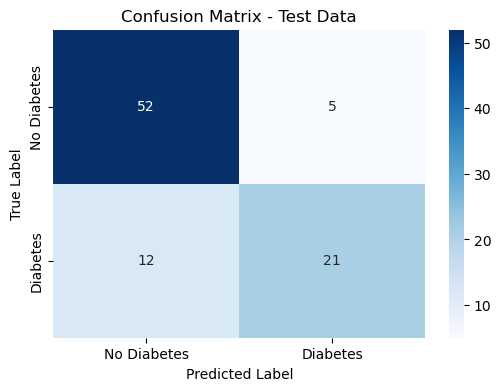

In [76]:
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test_scaled)[:, 1])

auc = roc_auc_score(Y_test, y_test_pred)
print(f'AUC: {auc:.2f}')


AUC: 0.77


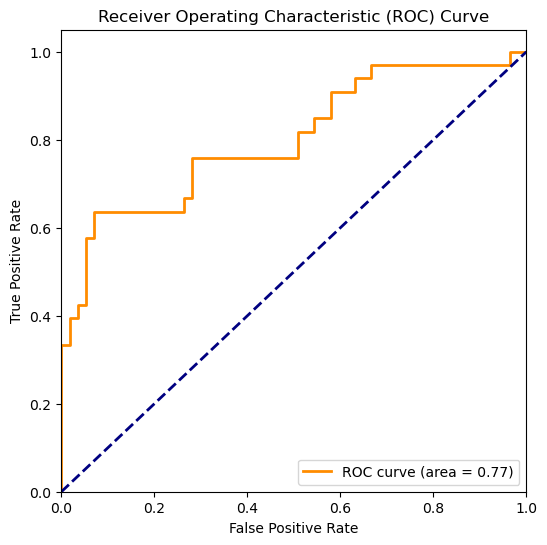

In [80]:
# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()